In [3]:
import os
Join = os.path.join
VAR_DIR  = Join(os.getcwd(), "var")

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['figure.figsize'] = (14,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

In [4]:
import win32api
import time
from datetime import datetime

from binance import Client
from binance.exceptions import BinanceAPIException

from env import *

def getClient():
    try:
        return Client(BINANCE_ACCESS, BINANCE_SECRET, {"verify": True, "timeout": 20})
    except BinanceAPIException as e:
        print(e)
        return False


def closeClient(client):
    try:
        client.close_connection()
    except BinanceAPIException as e:
        print(e)
        return False


def server_time_sync(client):
    try:
        server_time= client.get_server_time()
    
        gmtime = time.gmtime(int((server_time["serverTime"])/1000))
        win32api.SetSystemTime(gmtime[0],
                                gmtime[1],
                                0,
                                gmtime[2],
                                gmtime[3],
                                gmtime[4],
                                gmtime[5],
                                0)

    except BinanceAPIException as e:
        print(e)
        return False


def convert_time(t, f='%Y-%m-%d %H:%M:%S'):
    t = t/1000
    return datetime.fromtimestamp(t).strftime(f)

In [5]:
client = getClient()
assert client

server_time_sync(client)

In [7]:
import csv

# 현재 캔들 정보를 가져옵니다.
candles = client.get_klines(symbol='BTCUSDT',
                            interval=Client.KLINE_INTERVAL_1HOUR,
                            limit=14)

# 데이터 프레임 생성
df = pd.DataFrame(candles)

# 불필요한 컬럼 정리
df.drop(df.loc[:, 7:11], axis=1, inplace=True)
df = df.astype(float)
df.columns=['OpenTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'CloseTime']


closeClient(client)
print('Get End')

Get End


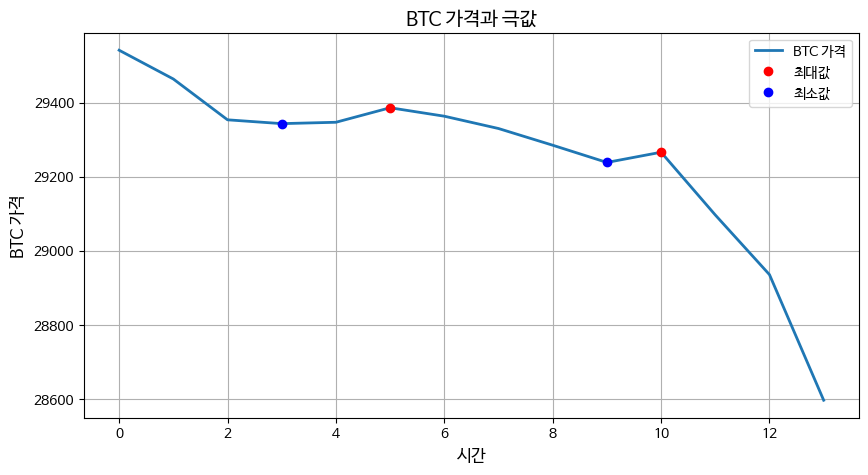

In [10]:
from scipy.signal import argrelextrema


close = df['Close']

max_idx = argrelextrema(close.values, np.greater)
min_idx = argrelextrema(close.values, np.less)

# 코인 그래프 그리기
plt.figure(figsize=(10,5))
plt.plot(close.index, close.values, label='BTC 가격')

# 최대값과 최소값 그래프 그리기
plt.plot(close.iloc[max_idx].index, close.iloc[max_idx].values, 'o', color='red', label='최대값')
plt.plot(close.iloc[min_idx].index, close.iloc[min_idx].values, 'o', color='blue', label='최소값')

# 그래프 제목, 라벨, 범례 등 설정
plt.title('BTC 가격과 극값', fontsize=14)
plt.xlabel('시간', fontsize=12)
plt.ylabel('BTC 가격', fontsize=12)
plt.legend()

# 그래프 출력
plt.show()

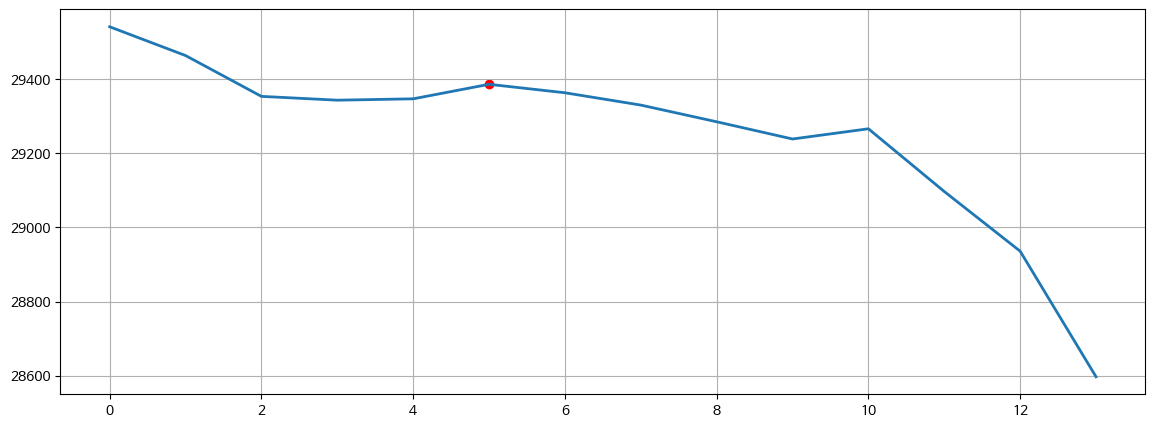

In [11]:
# 그래프 그리기
max_idx = argrelextrema(close.values, np.greater, order=1)

maxima = close[max_idx[0][np.argmax(close[max_idx[0]])]]
maxima_idx = max_idx[0][np.argmax(close[max_idx[0]])]

# 그래프 그리기
fig, ax = plt.subplots()
ax.plot(close)
ax.scatter(maxima_idx, maxima, c='r')
plt.show()